# Sammeln von Train- und Testdaten
Das spätere Modell soll die Zahl erkennen, die durch eine Handgeste repräsentiert wird. Dazu wird nur eine Hand verwendet und dadurch ergeben sich die Ziffern (0,1,2,3,4,5).


### Funktionen zur erstellung der Datenbasis

Im folgenden erkläre ich kurz die Funktionen zur generierung der Datenbasis. OpenCV ```cv2``` bildet die Grundlage zur Erzeugung und Verarbeitung der Bilder. Jedes Bild ist benannt mit einem Zeitstempel und der Bezeichnung der Handgeste. Zuerst wird eine Verbindung zur Webcam erzeugt und in der ```while```-Schleife wird jedes mal eine Frame aus der Webcam erzeugt. Jeder Frame wird zu einem Graustufenbild verarbeitet, mit dem auch später das Modell trainiert wird. Die Verwendung von Graustufenbildern anstat des RGB- oder BGR-Formates vereinfacht das spätere Modell. Da ich zum Trainieren des Modells einen etwas älteren Laptop mit nur vier Prozessoren verwendet habe, musste ich auch das Modell relativ einfach halten.

In der ```if```-Abfrage wird die zu speichernde Gestenbezeichnung ermittelt. Ich verwende ein Linux OS und die Strings ['0','1','2','3','4','5'] aus der Keyboard-Eingabe werden als Integer eingelsen und bei der Abfrage verwendet. Durch gedrückthalten der Tasten 0-5 werden die jeweiligen Bilder aufgenommen. Mit dieser Methode lassen sich in kurzer Zeit viele Bilder erzeugen, sodass eine kunstliche Erweiterung der Daten (Data-Augmentation) nicht notwendig ist. 

In [32]:
print([ord(i) for i in '012345'])

[48, 49, 50, 51, 52, 53]


#### Das Skript 
Zu finden unter: *../01_create_imgs.py*
```python
import numpy as np
import cv2
import datetime

def create_real_images_fast():
    
    cap = cv2.VideoCapture(0)
    number = 0
    while(True):
        ret, frame = cap.read()
        cv2.rectangle(frame,(40,80),(315,340),(0,255,0),3)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('frame',frame)        
        key = int(cv2.waitKey(1))        
        if key in [48,49,50,51,52,53]:
            now = str(datetime.datetime.now().strftime("%Y%m%d%H%M%S"))+str(number)
            print(key, now)
            cv2.imwrite('../gestures/train/{}_{}.png'.format(now, key-48), gray[40:315,80:340])
            number += 1
        if key & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()

            
if __name__=='__main__': 
    create_real_images_fast()
```

### Im Training verwendete Bilder
Im folgenden sind zufällig ausgewählte Bilder aus dem Trainingsdatensatz dargestellt.

In [5]:
import os
import pandas as pd

files = os.listdir('../../../gestures/train')
train_dict = {i:[j for j in files if i==j[-5]] for i in '012345'}

train = pd.DataFrame.from_dict(train_dict, orient='index')
train = train.transpose()
train.head()

,0,1,2,3,4,5
0,20180322172156421_0.png,201803222018352926_1.png,201803222018032094_2.png,201803222017541896_3.png,201803221723152318_4.png,20180322201651299_5.png
1,20180322172150281_0.png,201803222018493312_1.png,201803221722361400_2.png,201803221722481632_3.png,201803221723122240_4.png,2018032220164363_5.png
2,201803222019274319_0.png,201803222019003633_1.png,201803221722301250_2.png,201803221722451554_3.png,20180322201708671_4.png,20180322201657473_5.png
3,201803222019304404_0.png,201803222018443184_1.png,201803222018132352_2.png,201803221722471600_3.png,20180322201717946_4.png,201803221723252532_5.png
4,201803222019444811_0.png,201803222018483280_1.png,201803222018212598_2.png,201803222017451636_3.png,201803221723162328_4.png,201803221723362798_5.png


In [36]:
number_of_images = [len(train_dict[i]) for i in train_dict]

for geste,anzahl_der_bilder in enumerate(number_of_images):
    print('Geste {} --> #{}'.format(geste,anzahl_der_bilder))

Geste 0 --> #1364
Geste 1 --> #1551
Geste 2 --> #1416
Geste 3 --> #1248
Geste 4 --> #1119
Geste 5 --> #1092


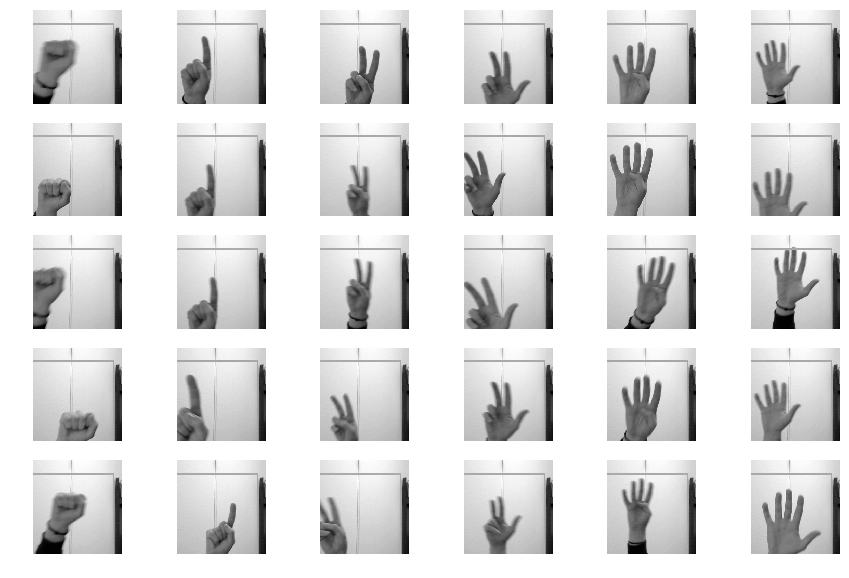

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
import random

number_of_images = [len(train_dict[i]) for i in train_dict]
fig = plt.figure(figsize=(15,10))
n = 1
for i in range(5):    
    sample = train.iloc[:1000].sample(n=1).values[0]
    for img_name in sample:
        img = plt.imread('../../../gestures/train/'+img_name)
        plt.subplot(5,6,n)
        plt.imshow(img,cmap='gray')
        plt.axis('off')  
        n += 1